In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
data=pd.read_csv(r"G:\New folder (2)\ali\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h>preprocessing</h>

In [65]:
data.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [67]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [68]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [69]:
data.drop(['Id'],inplace=True,axis=1)

<h>VISUALIZATION</h>

In [70]:
 x=data.iloc[:,:-1]
 y=data.iloc[:,-1]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [72]:
print(f"x_train:{x_train.shape}")
print(f"x_test:{x_test.shape}")


x_train:(120, 4)
x_test:(30, 4)


<h>Decision tree_Gini</h>

In [73]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
model=model.fit(x_train,y_train)

In [74]:
y_pred = model.predict(x_test)


In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy : {accuracy}')


accuracy : 0.9666666666666667


<h>Chek for over fitting</h>

In [76]:
print('Training score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test score: {:.4f}'.format(model.score(x_test, y_test)))


Training score: 0.9917
Test score: 0.9667


In [77]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



<h>Visualize decision tree</h>

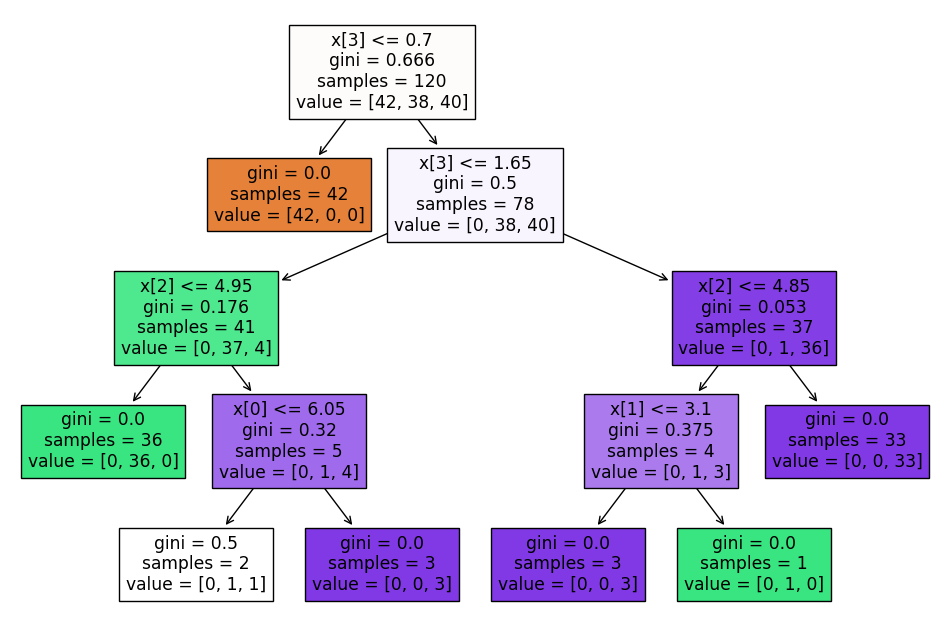

In [78]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True)
plt.show()


<h>Decision tree_Entropy</h>

In [79]:
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
model=model_entropy.fit(x_train,y_train)

In [80]:
y_pred_en=model_entropy.predict(x_test)

In [81]:
accuracy_entropy = accuracy_score(y_test, y_pred_en)
print(f'accuracy_score:{accuracy_entropy}')

accuracy_score:0.9666666666666667


<h>visualize decision tree</h>

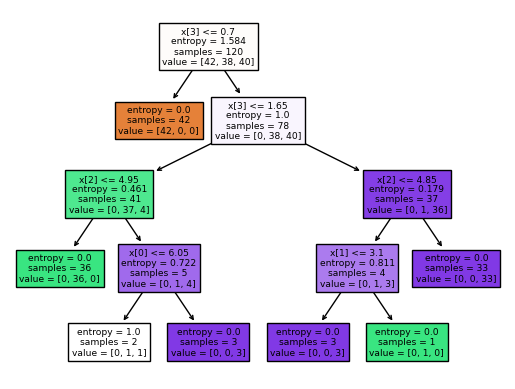

In [82]:
plt.Figure(figsize=(16,8))
plot_tree(model_entropy,filled=True)
plt.show()

In [83]:
train_accuracy = model.score(x_train, y_train)

# Print the accuracy
print(f'Accuracy: {train_accuracy}')


Accuracy: 0.9916666666666667


In [84]:
print(classification_report(y_test, y_pred_en))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

